<a href="https://colab.research.google.com/github/juliaricci03/aulamassaki/blob/main/FaturamentoEmpresa_Atualatual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install update pandas
!pip install streamlit
!pip install gradio
!pip install gradio pandas matplotlib seaborn
!pip install qrcode[pil]

In [51]:
import requests
import pandas as pd
from io import BytesIO

# URL da planilha exportada para CSV
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTgj4UpaAElR9ZRsyktDLwAPfLSIyhh7OamlMBwH1gNbp-KAp4-lblv5hTKKvLawfGL2uudFC-Exf8_/pub?output=csv'

# Baixar os dados CSV
rD = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if rD.status_code == 200:
    dataD = rD.content
    df = pd.read_csv(BytesIO(dataD))
    # Exibir as primeiras linhas do DataFrame
    print(df.head())
else:
    print("Erro ao acessar o arquivo. Código de status:", rD.status_code)


         MES   ANO  FATURAMENTO  META_FAT META_ALC
0    janeiro  2023          100       100      Sim
1  fevereiro  2023           80       120      Não
2      março  2023           60       140      Sim
3      abril  2023           40       160      Não
4       maio  2023           20       180      Sim


In [52]:
# Calculando a porcentagem da meta alcançada
df['Meta_Alcancada_%'] = (df['FATURAMENTO'] / df['META_FAT']) *100
print (df)

          MES   ANO  FATURAMENTO  META_FAT META_ALC  Meta_Alcancada_%
0     janeiro  2023          100       100      Sim        100.000000
1   fevereiro  2023           80       120      Não         66.666667
2       março  2023           60       140      Sim         42.857143
3       abril  2023           40       160      Não         25.000000
4        maio  2023           20       180      Sim         11.111111
5       junho  2023            0       200      Não          0.000000
6       julho  2023          200       220      Não         90.909091
7      agosto  2023          400       240      Não        166.666667
8    setembro  2023          600       260      Não        230.769231
9     outubro  2023          800       280      Sim        285.714286
10   novembro  2023         1000       300      Sim        333.333333
11   dezembro  2023         1200       320      Sim        375.000000
12    janeiro  2024         1400       340      Não        411.764706
13  fevereiro  2024 

In [53]:
# Calculando a taxa de crescimento do faturamento em relação ao mês anterior
df['Taxa_Crescimento_%'] = df['FATURAMENTO'].pct_change() * 100
print (df)


          MES   ANO  FATURAMENTO  META_FAT META_ALC  Meta_Alcancada_%  \
0     janeiro  2023          100       100      Sim        100.000000   
1   fevereiro  2023           80       120      Não         66.666667   
2       março  2023           60       140      Sim         42.857143   
3       abril  2023           40       160      Não         25.000000   
4        maio  2023           20       180      Sim         11.111111   
5       junho  2023            0       200      Não          0.000000   
6       julho  2023          200       220      Não         90.909091   
7      agosto  2023          400       240      Não        166.666667   
8    setembro  2023          600       260      Não        230.769231   
9     outubro  2023          800       280      Sim        285.714286   
10   novembro  2023         1000       300      Sim        333.333333   
11   dezembro  2023         1200       320      Sim        375.000000   
12    janeiro  2024         1400       340      Não

In [56]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = {
    'Mês': ['Janeiro', 'Fevereiro', 'Março', 'Abril'],
    'Ano': [2024, 2024, 2024, 2024],
    'Faturamento': [50000, 55000, 60000, 65000],
    'Meta de Faturamento': [55000, 55000, 60000, 70000],
    'Meta Alcançada': [False, True, True, False]
}
df = pd.DataFrame(data)

# Função para gerar o gráfico
def gerar_grafico():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mês', y='Faturamento', data=df, color='blue', label='Faturamento')
    sns.barplot(x='Mês', y='Meta de Faturamento', data=df, color='orange', label='Meta de Faturamento')

    plt.title('Faturamento vs Meta de Faturamento')
    plt.ylabel('Valor (R$)')
    plt.xlabel('Mês')
    plt.legend()

    # Salvando o gráfico em um arquivo
    plt.savefig("grafico.png")
    return "grafico.png"

# Criando a interface Gradio
with gr.Blocks() as interface:
    gr.Markdown("# Indicadores de Faturamento")
    gr.Dataframe(df, label="Tabela de Dados")
    btn = gr.Button("Gerar Gráfico")
    img_output = gr.Image()
    btn.click(gerar_grafico, outputs=img_output)

# Executar a interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://253c4f334b0be7a1a9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


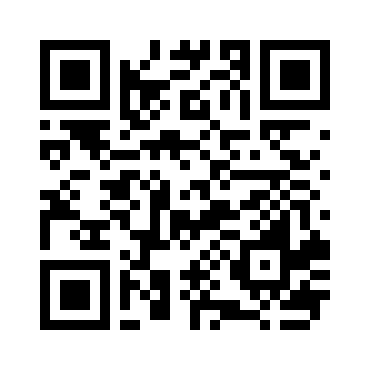

In [57]:
import qrcode

# Link do seu site
link = "https://253c4f334b0be7a1a9.gradio.live"

# Gerar o QR Code
qr = qrcode.make(link)

# Salvar a imagem em um arquivo
qr.save("/content/qrcode.png")

from IPython.display import Image

# Exibir a imagem gerada
Image("/content/qrcode.png")


Iniciando o download dos dados...
Dados baixados com sucesso.
Dados carregados:
         MES   ANO  FATURAMENTO  META_FAT META_ALC  Meta_Alcancada_%  \
0    janeiro  2023          100       100      Sim        100.000000   
1  fevereiro  2023           80       120      Não         66.666667   
2      março  2023           60       140      Sim         42.857143   
3      abril  2023           40       160      Não         25.000000   
4       maio  2023           20       180      Sim         11.111111   

   Taxa_Crescimento_%  
0                 NaN  
1          -20.000000  
2          -25.000000  
3          -33.333333  
4          -50.000000  
Iniciando a interface Gradio...
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4ff6930cced5464482.g

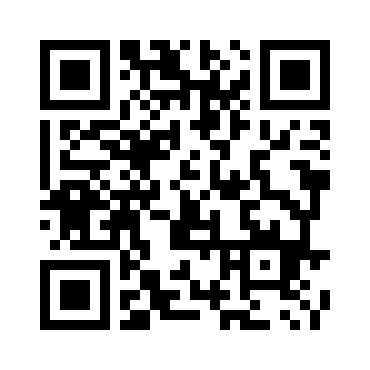

In [76]:
import requests
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import qrcode
from IPython.display import Image

# URL da planilha exportada para CSV
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTgj4UpaAElR9ZRsyktDLwAPfLSIyhh7OamlMBwH1gNbp-KAp4-lblv5hTKKvLawfGL2uudFC-Exf8_/pub?output=csv'

# Baixar os dados CSV
print("Iniciando o download dos dados...")
rD = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if rD.status_code == 200:
    dataD = rD.content
    print("Dados baixados com sucesso.")
    df = pd.read_csv(BytesIO(dataD))

    # Calculando a porcentagem da meta alcançada
    df['Meta_Alcancada_%'] = (df['FATURAMENTO'] / df['META_FAT']) * 100

    # Calculando a taxa de crescimento do faturamento em relação ao mês anterior
    df['Taxa_Crescimento_%'] = df['FATURAMENTO'].pct_change() * 100
else:
    print("Erro ao acessar o arquivo. Código de status:", rD.status_code)

# Verificar se os dados foram carregados corretamente
print("Dados carregados:")
print(df.head())

# Função para gerar o gráfico com Faturamento e Meta Alcançada (%)
def gerar_grafico():
    try:
        # Gerar o gráfico
        print("Gerando o gráfico...")
        plt.figure(figsize=(16, 10))  # Aumenta ainda mais o tamanho da figura

        # Faturamento
        bar_plot = sns.barplot(x='MES', y='FATURAMENTO', data=df, color='blue', label='Faturamento')

        # Adicionar os valores nas barras do gráfico
        for p in bar_plot.patches:
            bar_plot.annotate(format(p.get_height(), '.2f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha = 'center', va = 'center', fontsize=12,
                              color='black', xytext=(0, 9),
                              textcoords='offset points')

        # Porcentagem da meta alcançada
        line_plot = sns.lineplot(x='MES', y='Meta_Alcancada_%', data=df, color='red', marker='o', label='Meta Alcançada (%)')

        # Adicionar os valores nos pontos da linha
        for i, value in enumerate(df['Meta_Alcancada_%']):
            line_plot.text(i, value, f'{value:.2f}', color='red', ha='center', va='bottom', fontsize=12)

        plt.title('Faturamento e Meta Alcançada (%)', fontsize=18)
        plt.ylabel('Valor (R$) / Porcentagem (%)', fontsize=14)
        plt.xlabel('Mês', fontsize=14)
        plt.legend()

        # Ajustar o layout para evitar sobrecarga nos elementos
        plt.tight_layout()
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Aumenta as margens

        # Salvar o gráfico em um arquivo temporário
        output_file = '/content/grafico.png'
        plt.savefig(output_file, dpi=300)  # Usar uma resolução mais alta
        plt.close()  # Fechar o gráfico para evitar sobrecarga de memória

        print("Gráfico gerado com sucesso.")
        return output_file  # Retornar o caminho do arquivo com a imagem gerada

    except Exception as e:
        print(f"Erro ao gerar gráfico: {e}")
        return None

# Criando a interface Gradio
with gr.Blocks() as interface:
    gr.Markdown("# Indicadores de Faturamento")

    # Exibir todos os dados, incluindo as novas colunas
    gr.Dataframe(df.reset_index(drop=True), label="Tabela de Dados")

    # Botão para gerar gráfico
    btn = gr.Button("Gerar Gráfico")
    img_output = gr.Image(type="filepath", elem_id="grafico_img", height=600, width=1000)  # Aumenta o tamanho da imagem

    # Gerar gráfico ao clicar no botão
    btn.click(gerar_grafico, outputs=img_output)

# Executar a interface
print("Iniciando a interface Gradio...")
interface.launch()

# Gerar e exibir o QR Code
link = "https://434b13c74ecc621f5f.gradio.live"
qr = qrcode.make(link)
qr.save("/content/qrcode.png")
Image("/content/qrcode.png")
